In [2]:
import csv
import numpy as np
import pandas as pd
from PIL import Image
import PIL
import os, sys
import torch
import math
import matplotlib.pyplot as plt
import random
import torchvision
from torch import nn, Tensor
import torch.nn.functional as F
import tqdm

from helper import *

In [8]:
# with open('datasets/GSE140829_raw.csv', newline='') as dataset3:
#     genes = {'ID_REF': 'ID_REF'}
    
#     reader3 = csv.DictReader(dataset3, delimiter="\t")
    
#     for row in reader3:
#         if row['ILMN_GENE'] not in genes :
#             genes[row['ILMN_GENE']] = row['PROBE_ID']

In [9]:
# data = []

# with open('datasets/GSE140829.csv', newline='') as dataset3:
#     reader = csv.reader(dataset3, delimiter="\t")
    
#     for row in reader:
#         try:
#             row[0] = genes[row[0]]
#             data.append(row)
#         except KeyError:
#             print(f"gene {row[0]} does not exist!")

In [10]:
# with open('datasets/GSE140829.csv', 'w', newline='\n') as f:
#     writer = csv.writer(f, delimiter="\t", quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     writer.writerows(data)

In [11]:
commonGenes = []
genes1 = []
genes2 = []
genes3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader2:
    genes2.append(row[0])
    
for row in reader3:
    genes3.append(row[0])

for row in reader1:
    genes1.append(row[0])
    
    if row[0] in genes2 and row[0] in genes3:
        commonGenes.append(row[0])

dataset1.close()
dataset2.close()
dataset3.close()

In [12]:
# print(commonGenes)
# print(genes2)

In [13]:
set1 = []
set2 = []
set3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader1:
    if row not in set1 and row[0] in commonGenes:
        set1.append(row)
        
for row in reader2:
    if row not in set2 and row[0] in commonGenes:
        set2.append(row)
        
for row in reader3:
    if row not in set3 and row[0] in commonGenes:
        set3.append(row)
    
# set1.sort(key=lambda x: x[0])
# set2.sort(key=lambda x: x[0])
# set3.sort(key=lambda x: x[0])

data1 = []
data2 = []
data3 = []
    
for i in range(len(set1[0])):
    rowData = []

    for row in set1:
        rowData.append(row[i])

    data1.append(rowData)
    
for i in range(len(set2[0])):
    rowData = []

    for row in set2:
        rowData.append(row[i])

    data2.append(rowData)
    
for i in range(len(set3[0])):
    rowData = []

    for row in set3:
        rowData.append(row[i])

    data3.append(rowData)

dataset1.close()
dataset2.close()
dataset3.close()

In [14]:
print(len(data3[0]))

10678


In [15]:
conditions = {}

dataset1 = open('datasets/GSE63060info.csv', newline='')
dataset2 = open('datasets/GSE63061info.csv', newline='')
dataset3 = open('datasets/GSE140829info.csv', newline='')

reader1 = csv.DictReader(dataset1, delimiter="\t")
reader2 = csv.DictReader(dataset2, delimiter="\t")
reader3 = csv.DictReader(dataset3, delimiter="\t")

conData = []

for row in reader1:
    conData.append(row)
        
for row in reader2:
    conData.append(row)
    
for row in reader3:
    conData.append(row)
    
conditions = merge(conData[0], conData[1])
conditions = merge(conditions, conData[2])

dataset1.close()
dataset2.close()
dataset3.close()

In [16]:
for i in range(len(data1[0])):
    if data1[0][i] != data2[0][i]:
        print(data1[0][i])
        print(i)
        break

ILMN_2403446
54


In [17]:
if data1[0][0] == "ID_REF":
    del data1[0]

if data2[0][0] == "ID_REF":
    del data2[0]

if data3[0][0] == "ID_REF":
    del data3[0]

In [18]:
# Remove 4856076038_D, as it has no diagnosis

for i in range(len(data1)):
    try:
        if data1[i][0] not in conditions.keys():
            print(data1[i][0])
            print(i)
            
            del data1[i]
    except:
        pass

4856076038_D
208


In [19]:
i = 0

while i < len(data1):
    if conditions[data1[i][0]] == "MCI":
        data1.pop(i)
    
    else:
        i += 1

In [20]:
i = 0

while i < len(data2):
    if conditions[data2[i][0]] == "MCI":
        data2.pop(i)
    
    else:
        i += 1

In [21]:
with open('datasets/data2.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(data2)

In [22]:
# print(data2[2])

In [23]:
i = 0

while i < len(data3):
    if conditions[data3[i][0]] == "MCI":
        data3.pop(i)
    
    else:
        i += 1

In [24]:
data1 = toFloat(data1)
data2 = toFloat(data2)
data3 = toFloat(data3)

In [25]:
data = data1 + data2 + data3

# data = data3

data = normalizeRow(data)
data = normalize(data)

random.shuffle(data)

nnTrain = len(data) - int(len(data) * 0.2)

In [26]:
print(nnTrain)

761


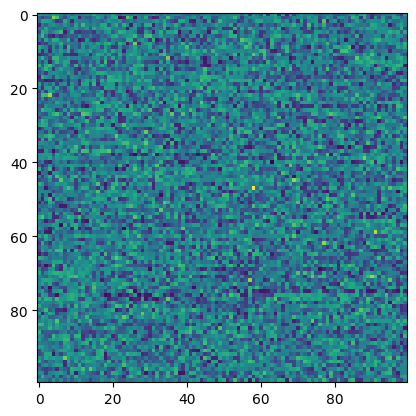

In [27]:
import matplotlib.pyplot as plt

plt.imshow(torch.Tensor(data1[1][1:10001]).view(100, 100))

In [28]:
for item in data:
    try:
        item[0] = getCondition(conditions[item[0]])
    except:
        pass

In [29]:
ad = 0
ctl = 0

for i in range(len(data)):
    if data[i][0] == 1:
        ad += 1
    else:
        ctl += 1

In [30]:
print(ad)
print(ctl)

483
468


In [31]:
train = data[:nnTrain]
test = data[nnTrain:]

In [32]:
rValues = getRValues(train, test, ctl, ad)

In [33]:
FINAL_LEN = 1024
BLOCK_SIZE = 128
DATA_LEN = 4096

NOISE = 60

TRAIN_LEN = NOISE * nnTrain
TOTAL_LEN = TRAIN_LEN + len(data) - nnTrain

repeats = math.ceil(FINAL_LEN / (DATA_LEN / BLOCK_SIZE))

In [34]:
del rValues[DATA_LEN:]

In [29]:
processAll(repeats, rValues, DATA_LEN, BLOCK_SIZE, NOISE, train, test)

In [35]:
if BLOCK_SIZE == 1:
    fullTrain = []
    fullTest = []

    for i in range(len(train)):
        rowData = []

        for j in range(len(rValues)):
            rowData.append(train[i][rValues[j][0] + 1])

        rowData.insert(0, float(train[i][0]))
        fullTrain.append(rowData)
        
    
    for x in range(NOISE - 1):
        for i in range(len(train)):
            rowData = []

            for j in range(len(rValues)):
                a = np.random.normal(loc=0, scale=0.03)
                rowData.append(train[i][rValues[j][0] + 1] + a)

            rowData.insert(0, float(train[i][0]))
            fullTrain.append(rowData)


    for i in range(len(test)):
        rowData = []

        for j in range(len(rValues)):
            rowData.append(test[i][rValues[j][0] + 1])

        rowData.insert(0, float(test[i][0]))
        fullTest.append(rowData)
    
    with open('datasets/train_anm.csv', 'w') as f:
        writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerows(fullTrain)
    
    with open('datasets/test_anm.csv', 'w') as f:
        writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerows(fullTest)
    
    exit(0)

In [36]:
print(len(rowData))

10678


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

headers = ['labels'] + list(range(BLOCK_SIZE))

train = pd.read_csv('datasets/train_full/0.csv', names=headers)
test = pd.read_csv('datasets/test_full/0.csv', names=headers)

y_train = train["labels"]
y_test = test["labels"]

LDAtrain = [list(y_train)]
LDAtest = [list(y_test)]

if NOISE > 1:
    noise = pd.read_csv('datasets/noise_full/0.csv', names=headers)
    y_noise = noise["labels"]
    LDAnoise = [list(y_noise)]

for i in tqdm.notebook.tqdm(range(FINAL_LEN)):
    train = pd.read_csv(f'datasets/train_full/{i}.csv', names=headers)
    test = pd.read_csv(f'datasets/test_full/{i}.csv', names=headers)
    
    if NOISE > 1:
        noise = pd.read_csv(f'datasets/noise_full/{i}.csv', names=headers)
        
        X_noise = noise.drop(["labels"], axis=1)
        y_noise = noise["labels"]
    
    X_train = train.drop(["labels"], axis=1)
    y_train = train["labels"]
    
    X_test = test.drop(["labels"], axis=1)
    y_test = test["labels"]
    
    model = LinearDiscriminantAnalysis(n_components=1)
    
    X_train_lda = model.fit_transform(X_train, y_train)
    X_test_lda = model.transform(X_test)
    
    LDAtrain.append(X_train_lda)
    LDAtest.append(X_test_lda)
    
    if NOISE > 1:
        X_noise_lda = model.transform(X_noise)
        LDAnoise.append(X_noise_lda)

  0%|          | 0/1024 [00:00<?, ?it/s]

In [38]:
print(len(LDAtrain), len(y_train))

1025 761


In [39]:
train = []
test = []
noise = []

In [40]:
for i in range(len(LDAtrain[0])):
    rowData = []

    for row in LDAtrain:
        rowData.append(float(row[i]))
        
    train.append(rowData)

In [41]:
for i in range(len(LDAtest[0])):
    rowData = []

    for row in LDAtest:
        rowData.append(float(row[i]))
        
    test.append(rowData)

In [42]:
if NOISE > 1:
    for i in range(len(LDAnoise[0])):
        rowData = []

        for row in LDAnoise:
            rowData.append(float(row[i]))

        noise.append(rowData)

In [43]:
rValues = getRValues(train, test, ctl, ad)

del rValues[FINAL_LEN:]

sortedTrain = []
sortedTest = []
sortedNoise = []

for i in range(len(train)):
    rowData = []

    for j in range(len(rValues)):
        rowData.append(train[i][rValues[j][0] + 1])

    rowData.insert(0, float(train[i][0]))
    sortedTrain.append(rowData)


for i in range(len(test)):
    rowData = []

    for j in range(len(rValues)):
        rowData.append(test[i][rValues[j][0] + 1])

    rowData.insert(0, flip(float(test[i][0])))
    sortedTest.append(rowData)

if NOISE > 1:
    for i in range(len(noise)):
        rowData = []

        for j in range(len(rValues)):
            rowData.append(noise[i][rValues[j][0] + 1])

        rowData.insert(0, float(noise[i][0]))
        sortedNoise.append(rowData)

In [44]:
if NOISE > 1:
    data = sortedTrain + sortedNoise + sortedTest
    
else:
    data = sortedTrain + sortedTest

data = normalize(data)

sortedTrain = data[:TRAIN_LEN]
sortedTest = data[TRAIN_LEN:]

In [45]:
# for i in range(len(sortedTest[0])):
#     flipCol(sortedTest, i)

In [46]:
# train2 = sortedTrain.copy()

# for i in range(len(train2[0])):
#     flipCol(train2, i)
    
# sortedTrain = sortedTrain + train2

In [47]:
print(len(sortedTest))
print(len(sortedTrain))

print(len(sortedTrain[0]))
print(len(sortedTest[0]))

190
45660
1025
1025


In [48]:
with open('datasets/train.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(sortedTrain)
    
with open('datasets/test.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(sortedTest)